INTRODUCTION:

Hi there! This is an analysis of sample data available from the titanic disaster which occured on the 12th of April 1912.

THE INCIDENT:
    
The RMS Titanic, on her maiden voyage from Southampton to New York City, sank on the night of April 12th, 1912 after colliding at full speed into an iceberg. Over 1500 people travelling on board were reported to be dead. This disaster had several implications which ultimately lead to better maritime laws and better safety for the passengers.

What are we doing here?

In this project, we are going to conduct a simple analysis on the Titanic based on some sample data available.
We are going to see more about the survivors and the various trends which were seen among the dead.

So, at the end of this analysis, you will be able to answer a question like: Who is the most likely to survive, based on gender, age, class, boarding point and such.

QUESTIONS ANALYSED:

1) Which gender has a better chance of survival?

2) Does age play a role in survival chances?

3) What does the ticket fare say about the survival chances?

4) Does the boarding point play a role in determining the survival rate?

First of all, let's start by allowing centered plots:

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Now, let us import the required libraries from python:

In [8]:
%matplotlib inline
import unicodecsv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
titanic_df = pd.read_csv('C:\\Users\\anant\\Udacity\\titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The above table contains the data of the first five members present in the file.

In [11]:
titanic_df.shape

(891, 12)

The above code tells us the number of entries present in the file in the format (x,y). This shows us that there are 891 people present with 12 fields providing the details about them.

Variable Description:

Survival: Those who survived (The Survived column is the target variable) If Suvival = 1 the passenger survived, otherwise he's dead.

The other variables that describe the passengers are:

PassengerId: An id given to each traveler on the boat

Pclass: The passenger class. It has three possible values: 1,2,3 (ie:) first class, second class and third class.

Name: Provides the name of the passenger on board

Sex: Gender of the passenger on board

Age: Age of the passenger on board

SibSp: Number of siblings and spouses traveling with the passenger

Parch: Number of parents and children traveling with the passenger

ticket: Ticket number

fare: The fare tendered by the passenger

cabin: The cabin number

embarked: The place where the passenger boarded. It has three possible values S,C,Q 
    S = Southampton, Q = Queenstown, C = Cherbourg, 

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe() function is present in pandas and is very useful. It displays the important paramters along with their statistical data, which is of great use to a data sceintist.

There is an important observation to be made here. While there are 891 passengers, there are only 714 people with their ages. So, the ages of 177 people is missing. This shall be corrected using Data Wrangling pretty soon.

In [15]:
#To check the missing values in the given data using isnull().sum() function
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So, we can confirm that there are missing values age and can see certain issues in cabin and embarked data too.

In [81]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

A good way to correct this is to replace the missing values with the median age. This is because the median handles outliers better than the mean. We cannot proceed with our analysis with empty age values. Now, let us check the count of age:

In [14]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There it is. We can see that the data has been corrected. We can proceed with our analysis. Let's start by correcting the data types of the variables involved.

In [16]:
titanic_df['Fare']=(titanic_df['Fare']).astype(float)
titanic_df['Age']=titanic_df['Age'].astype(float)
titanic_df['Survived']=titanic_df['Survived'].astype(int)
titanic_df['SibSp']=titanic_df['SibSp'].astype(int)
titanic_df['Parch']=titanic_df['Parch'].astype(int)

Let us proceed to make some visualizations. Starting off with the number of passengers based on age:

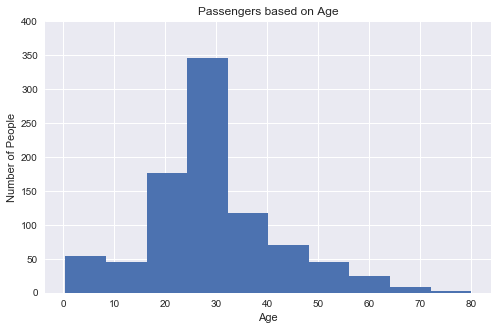

In [42]:
ax=titanic_df['Age'].plot(kind ='hist', bins = 10, figsize = (8,5)) 
ax.set_xlabel('Age')
ax.set_ylabel('Number of People')
ax.set_ylim(0, 400)
ax.set_title('Passengers based on Age')

Now let's check how many people survived based on gender:

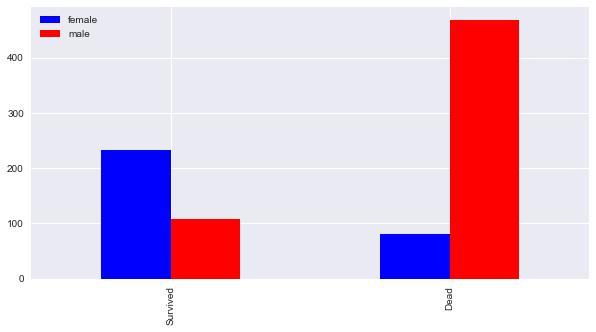

In [46]:
survived_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=False, figsize=(10,5), color= ['b','r'])

We can see that a high number of Females survived the disaster, while the men weren't that fortunate.

Now, let us correlate the survival with the age of the passengers:

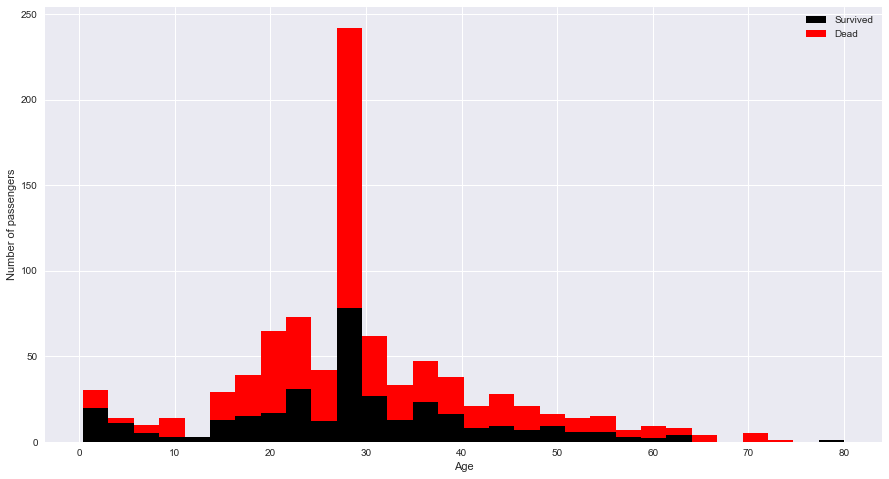

In [40]:
figure = plt.figure(figsize=(15,8))
plt.hist([titanic_df[titanic_df['Survived']==1]['Age'], titanic_df[titanic_df['Survived']==0]['Age']], stacked=True, color = ['black','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

We can see that those between ~28 and 30 were the highest survivors. Most of the elderly persons did not make it unfortunately. 
An important point to note is that while we can see the maximum survivors aged close to 30, we cannot say that the maximum percentage of passengers aged 28-30 survived. This is because the majority of passengers might have been of that age.

In [ ]:
So, we can make out that women and children were given the first preference during the rescue operations.

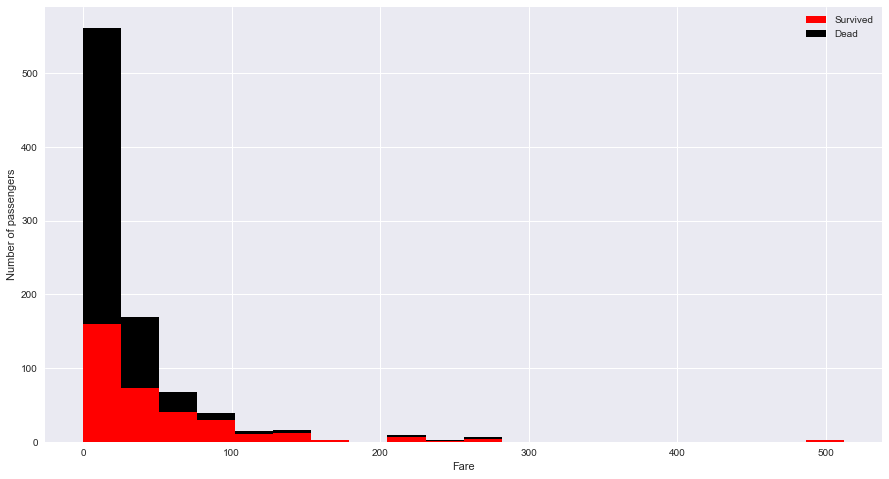

In [58]:
figure = plt.figure(figsize=(15, 8))
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'], titanic_df[titanic_df['Survived']==0]['Fare']], stacked=True, color = ['red','black'],
         bins = 20,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

We can see that the passengers with costlier tickets are more likely to survive. Another way to put it is that the First Class passengers are given the highest priority. So money did pay for their lives to an extent.

Now, let us compare the embarkation point with survival rate:

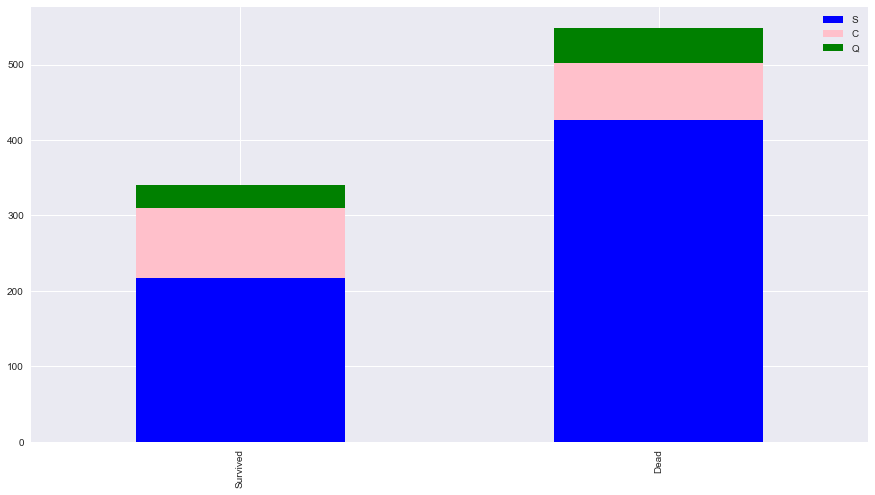

In [65]:
survived_embark = titanic_df[titanic_df['Survived']==1]['Embarked'].value_counts()
dead_embark = titanic_df[titanic_df['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8), color = ['blue', 'pink','green'])

We cannot identify any specific correlation here. This was just based purely on coincidence or "luck".

In [76]:
titanic_df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.361582
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [80]:
titanic_df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

CONCLUSIONS:

ANSWERING THE QUESTIONS PUT FORTH:

1) Females had a better chance of survival.
2) Most of the elderly people and the young children had a better chance of surviving than those between the ages 12 and 50.
3) The fare played a huge role in the survival rate. Those who paid higher fares had a better chance of surviving (FIrst class passengers had the best chance of surviving)
4) The boarding point had nothing to do with the chances of survival. There might be certain trends but they are purely coincidental.

ADDITIONAL CONCLUSIONS:

1) The mean age of the passengers was 29.36.
2) The median age was 28.
    So we can say that most of the passengers were approximately within the age of 28 to 30.
3) Based on the mean of PClass, we can see that most of the passengers either belonged to third class (maximum) or second class.
   Had there been more first class passengers, the overall survival rate would have improved.
4) The mean fare is way more than the median fare. It can be seen that the mean is boosted heavily due to the extreme difference    in fares between the first class and other classes. This tells us that median handles outliers better than the mean.
5) Based on point 4, we have used the median ages to fill the missing data instead of the mean ages to get more appropriate        results.
6) Women and children were given preference during the rescue operations

PERSONAL VIEWS:

We can clearly see that the rich were favoured more than the second and third class passengers. So, had there been more first class passengers, the survival rate would have improved a lot. There was improper coorindation which led to the deaths of many people. Most of the lifeboats were sent even when they were not full. This could have been prevented had there been more rich and thereby "deserving" members on board.

ASSUMPTIONS:

1) The data provided consists of only 891 members while there were actually 2224 members on board (wikipedia).
   So, this is only a sample data and there might be certain deviation from these findings when compared with the population.
2) It is difficult to classify the data into the people and their families, as more than one person can have the same name, so      it is not a foolproof practice.
3) The value of standard deviation will vary a bit because we have used the formula for the population while it is actually the    sample standard deviation. Though it would not make much of a change, this point must be kept in mind.

REFERENCES:

I used a lot of references to understand more about the usage of pandas and python coding in general. Some of the sites I referred to are listed below:

Stackoverflow
ocw.mit.edu
pandas.pydata.org
python plotting beginners guide
kaggle
wikipedia

I hope I haven't missed any reference.